In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [53]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371566,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367031,477131200


In [54]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.082321,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.148003,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519913,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493156,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911560,144114400


In [55]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371566,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367031,477131200


In [56]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200


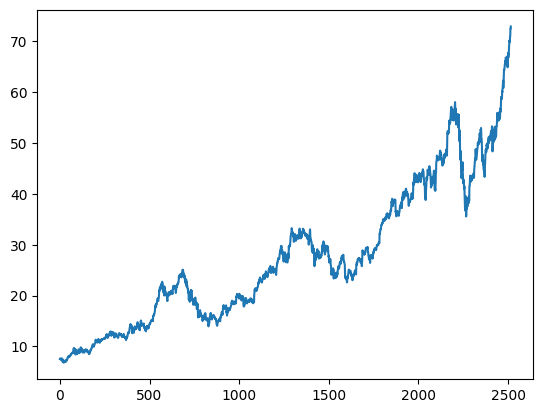

In [57]:
plt.plot(df.Close)

In [58]:
df


,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200
...,...,...,...,...,...
2511,70.132500,71.062500,70.092499,71.000000,98572000
2512,71.172501,71.222504,70.730003,71.067497,48478800
2513,71.205002,72.495003,71.175003,72.477501,93121200
2514,72.779999,73.492500,72.029999,72.449997,146266000


In [59]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.201075
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
Name: Close, Length: 2516, dtype: float64

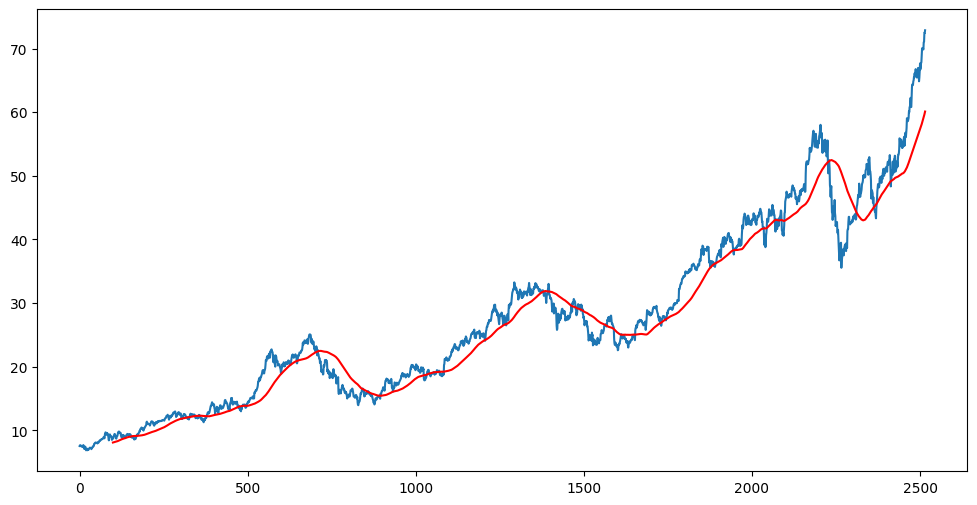

In [60]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [61]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.132313
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
Name: Close, Length: 2516, dtype: float64

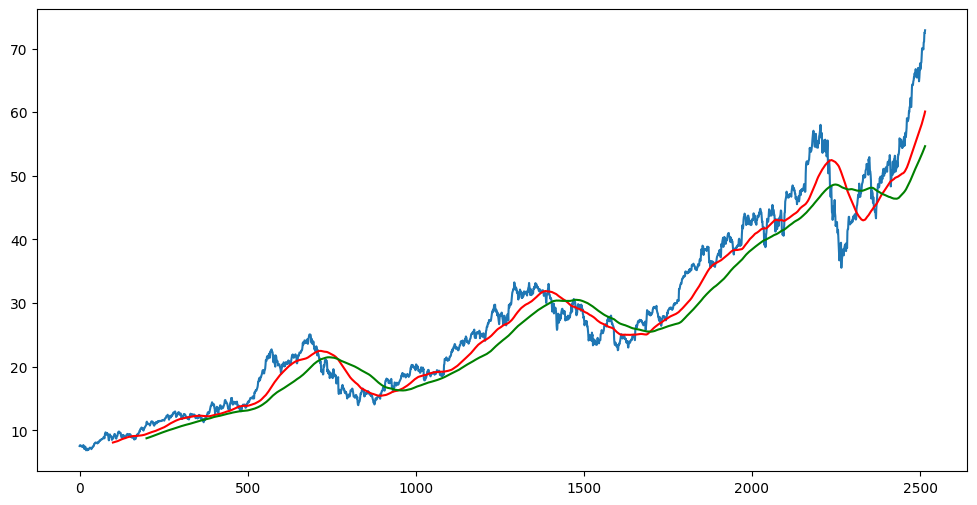

In [62]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [63]:
df.shape


(2516, 5)

In [64]:
#splitting data into training and testing

#training data with 70% values
#30% data is testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [65]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Assuming data_training is your training data
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
x_train = []
y_train =[] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1661, 100, 1)

In [20]:
# ML Model

In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units =50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units =60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs =50)


Epoch 1/50

52/52 [==============================] - 26s 365ms/step - loss: 0.0634
Epoch 2/50
52/52 [==============================] - 20s 377ms/step - loss: 0.0151
Epoch 3/50
52/52 [==============================] - 19s 368ms/step - loss: 0.0107
Epoch 4/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0080
Epoch 7/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0079
Epoch 8/50
52/52 [==============================] - 17s 330ms/step - loss: 0.0071
Epoch 9/50
52/52 [==============================] - 17s 336ms/step - loss: 0.0082
Epoch 10/50
52/52 [==============================] - 19s 363ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 19s 363ms/step - loss: 0.0078
Epoch 12/50
52/52 [==============================] - 18s 355ms/step - loss: 0.0076
Epoch 13/50

In [31]:
model.save('keras_model.keras')

In [32]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [33]:
past_100_days = data_training.tail(100)

In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [38]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [39]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [41]:
input_data.shape


(855, 1)

In [43]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [45]:
# making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 6s 144ms/step


In [46]:
y_predicted.shape

(755, 1)

In [47]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [48]:
y_predicted

array([[0.14552839],
       [0.14621335],
       [0.14690407],
       [0.1475842 ],
       [0.14824153],
       [0.14886688],
       [0.14945981],
       [0.15002994],
       [0.15059128],
       [0.15115775],
       [0.15173952],
       [0.15233824],
       [0.15295388],
       [0.15358743],
       [0.15423603],
       [0.15489458],
       [0.1555579 ],
       [0.15622042],
       [0.15688291],
       [0.1575466 ],
       [0.15821707],
       [0.1588966 ],
       [0.15958272],
       [0.1602956 ],
       [0.16108003],
       [0.16196015],
       [0.1629378 ],
       [0.16404033],
       [0.16528912],
       [0.16669755],
       [0.16826859],
       [0.16999897],
       [0.17188622],
       [0.17392616],
       [0.17611198],
       [0.17843309],
       [0.18087906],
       [0.1834398 ],
       [0.18610069],
       [0.1888434 ],
       [0.19164875],
       [0.19449748],
       [0.19736446],
       [0.20023811],
       [0.20311709],
       [0.2059946 ],
       [0.20885716],
       [0.211

In [49]:
scaler.scale_

array([0.02123255])

In [50]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

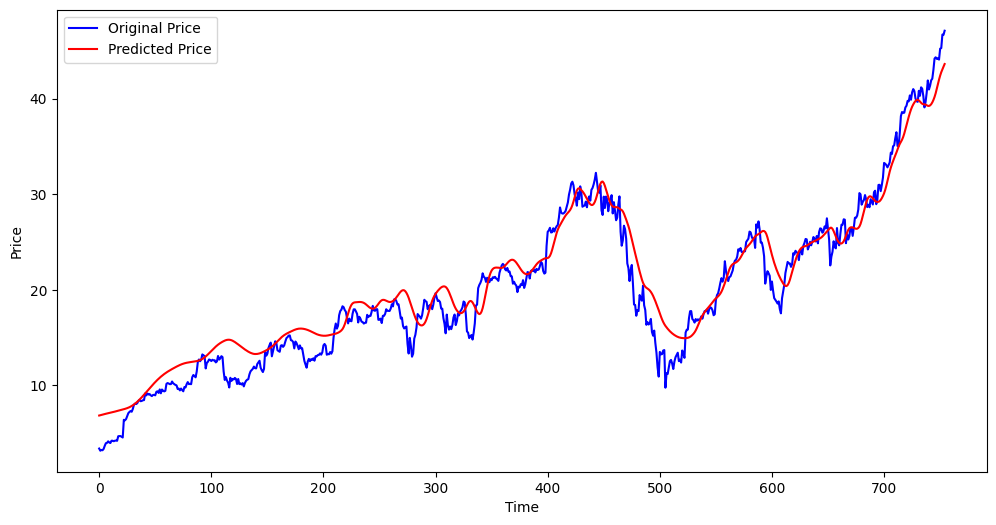

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()